In [169]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [171]:
import json

f=open('usagov_bitly_data2012-03-16-1331923249.txt', encoding='utf-8')
records = [json.loads(line) for line in f]
f.close()

In [172]:
print(records[0])
type(records), len(records)

{'ll': [42.576698, -70.954903], 'gr': 'MA', 'hc': 1331822918, 'nk': 1, 'al': 'en-US,en;q=0.8', 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991', 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf', 'l': 'orofrog', 'tz': 'America/New_York', 'g': 'A6qOVH', 't': 1331923247, 'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11', 'cy': 'Danvers', 'hh': '1.usa.gov', 'c': 'US', 'h': 'wfLQtf'}


(list, 3560)

In [173]:
records[0]['tz']

'America/New_York'

In [174]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [175]:
counts = {}
for x in time_zones:
    if x in counts:
        counts[x] += 1
    else:
        counts[x] = 1
        
#counts

In [176]:
top_counts = sorted(counts.items(),key=(lambda x: x[1]))[::-1]
top_counts[:10]

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

- pandas 적용

In [177]:
frame = pd.DataFrame(records)
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [178]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [179]:
print(len(frame['tz'][frame['tz'].isnull()])) # isnull(), notnull(), dropna(), fillna(), np.nan
print(len(frame[frame['tz'].isnull()]))

s=pd.Series([1,2,np.nan,3])
print(len(s), s.count())
print(pd.isnull(s[2]))
print(s.isnull())

d=pd.DataFrame([[1,2],[3,4]])
d[[True,False]]
d.iloc[1]

120
120
4 3
True
0    False
1    False
2     True
3    False
dtype: bool


0    3
1    4
Name: 1, dtype: int64

In [180]:
len(frame['tz']), frame['tz'].count()

(3560, 3440)

In [181]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

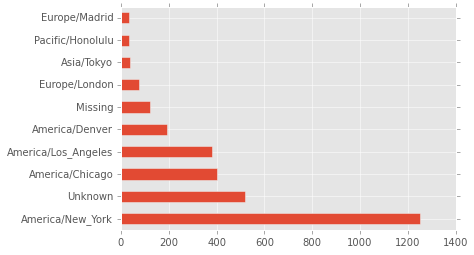

In [182]:
tz_counts[:10].plot(kind='barh',rot=0)

In [183]:
print(frame.a[:10])
results=pd.Series([x.strip().split()[0] for x in frame.a.dropna()])
# results = df.a.dropna().apply(lambda x: x.split()[0])
results.value_counts()[:8]

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
5    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6    Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
7    Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...
8    Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...
9    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object


Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [184]:
cframe = frame[frame.a.notnull()]
operating_system = np.where(cframe.a.str.contains('Windows'),'Windows','Not Windows')

by_tz_os = cframe.groupby(['tz',operating_system])
agg_counts = by_tz_os.size().unstack().fillna(0)
display(agg_counts[:10])

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


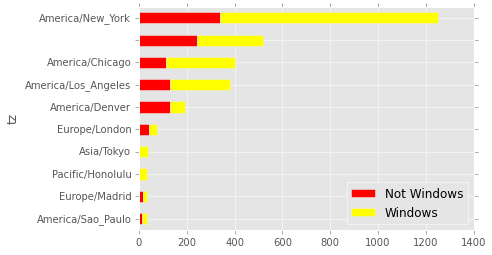

In [185]:
#agg_counts['total'] = agg_counts.sum(axis=1)
#agg_counts.sort_values('total',ascending=False)
indexer = agg_counts.sum(axis=1).argsort()
count_subset = agg_counts.iloc[indexer][-10:]
display(count_subset)
count_subset.plot(kind='barh',stacked=True,cmap='autumn')

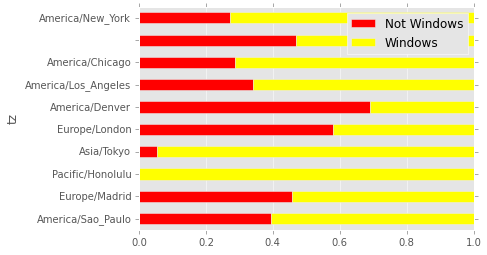

In [186]:
normed_subset = count_subset.div(count_subset.sum(1),axis=0)
normed_subset.plot(kind='barh',stacked=True,cmap='autumn')